# Valutazione della matrice di correlazione {#sec-evaluate-matrices}

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [2]:
here::here("code", "_common.R") |>
    source()

# Load packages
if (!requireNamespace("pacman")) install.packages("pacman")
pacman::p_load(lavaan, corrr, psych)

## Introduzione

Prima di eseguire un’analisi fattoriale, è importante esaminare la matrice di correlazione tra le variabili. Se il determinante della matrice è nullo, l’analisi fattoriale non può essere eseguita. In caso contrario, è necessario valutare se le correlazioni campionarie sono sufficientemente grandi da giustificare l’analisi fattoriale. Se le correlazioni tra gli item sono modeste, la soluzione fornita dall’analisi fattoriale potrebbe non essere parsimoniosa. Per valutare questo, si può ispezionare visivamente la matrice di correlazione e utilizzare due test: il test della sfericità di Bartlett e il test Kaiser-Meyer-Olkin.

## Ispezione visiva della matrice di correlazione

L’ispezione visiva della matrice di correlazione viene effettuata per verificare la presenza di blocchi di correlazioni alte tra loro e basse con le altre variabili. Ciò suggerisce la presenza di più fattori comuni.

Per fare un esempio, consideriamo il dataset `HolzingerSwineford1939`. Tale dataset contiene 301 osservazioni di punteggi di abilità mentale. Consideriao qui le variabili `x1` -- `x9`.

In [3]:
data(HolzingerSwineford1939)
glimpse(HolzingerSwineford1939)

Rows: 301
Columns: 15
$ id     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, ~
$ sex    <int> 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, ~
$ ageyr  <int> 13, 13, 13, 13, 12, 14, 12, 12, 13, 12, 12, 12, 12, 12, 12, 12,~
$ agemo  <int> 1, 7, 1, 2, 2, 1, 1, 2, 0, 5, 2, 11, 7, 8, 6, 1, 11, 5, 8, 3, 1~
$ school <fct> Pasteur, Pasteur, Pasteur, Pasteur, Pasteur, Pasteur, Pasteur, ~
$ grade  <int> 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ~
$ x1     <dbl> 3.333333, 5.333333, 4.500000, 5.333333, 4.833333, 5.333333, 2.8~
$ x2     <dbl> 7.75, 5.25, 5.25, 7.75, 4.75, 5.00, 6.00, 6.25, 5.75, 5.25, 5.7~
$ x3     <dbl> 0.375, 2.125, 1.875, 3.000, 0.875, 2.250, 1.000, 1.875, 1.500, ~
$ x4     <dbl> 2.333333, 1.666667, 1.000000, 2.666667, 2.666667, 1.000000, 3.3~
$ x5     <dbl> 5.75, 3.00, 1.75, 4.50, 4.00, 3.00, 6.00, 4.25, 5.75, 5.00, 3.5~
$ x6     <dbl> 1.2857143, 1.2857143, 0.4285714, 2.4285714, 2.5714286, 0.857142~
$ x7     <dbl> 3.3

In [4]:
hz <- HolzingerSwineford1939 |>
  select(x1:x9)

hz |>
  slice(1:5) 

x1,x2,x3,x4,x5,x6,x7,x8,x9
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.333333,7.75,0.375,2.333333,5.75,1.2857143,3.391304,5.75,6.361111
5.333333,5.25,2.125,1.666667,3.00,1.2857143,3.782609,6.25,7.916667
4.500000,5.25,1.875,1.000000,1.75,0.4285714,3.260870,3.90,4.416667
5.333333,7.75,3.000,2.666667,4.50,2.4285714,3.000000,5.30,4.861111
4.833333,4.75,0.875,2.666667,4.00,2.5714286,3.695652,6.30,5.916667


Valutiamo la presenza di dati mancanti.

In [5]:
missings <- colSums(is.na(hz)) # Count # missing in each column
summary(missings) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

In questo set di dati non ci sono dati mancanti.

Esaminiamo la distribuzione delle variabili.

In [6]:
describe(hz)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
x1,1,301,4.935770,1.167432,5.000000,4.964730,1.235500,0.6666667,8.500000,7.833333,-0.2543455,0.30753382,0.06728967
x2,2,301,6.088040,1.177451,6.000000,6.017635,1.111950,2.2500000,9.250000,7.000000,0.4700766,0.33239397,0.06786712
x3,3,301,2.250415,1.130979,2.125000,2.199170,1.297275,0.2500000,4.500000,4.250000,0.3834294,-0.90752645,0.06518857
x4,4,301,3.060908,1.164116,3.000000,3.024896,0.988400,0.0000000,6.333333,6.333333,0.2674867,0.08012676,0.06709855
x5,5,301,4.340532,1.290472,4.500000,4.395228,1.482600,1.0000000,7.000000,6.000000,-0.3497961,-0.55253689,0.07438158
x6,6,301,2.185572,1.095603,2.000000,2.088322,1.059000,0.1428571,6.142857,6.000000,0.8579486,0.81655717,0.06314952
x7,7,301,4.185902,1.089534,4.086957,4.163630,1.095835,1.3043478,7.434783,6.130435,0.2490881,-0.30740386,0.06279967
x8,8,301,5.527076,1.012615,5.500000,5.492946,0.963690,3.0500000,10.000000,6.950000,0.5252580,1.17155564,0.05836617
x9,9,301,5.374123,1.009152,5.416667,5.366067,0.988400,2.7777778,9.250000,6.472222,0.2038709,0.28990791,0.05816654


I valorei di asimmetria e kurosi sono adeguati.

Consideriamo ora le correlazioni tra le variabili usando le funzioni del pacchetto `corrr`:

- `corrr::rearrange` raggruppa le variabili altamente correlate 
- `corrr::rplot` visualizza il risultato.

Correlation computed with
* Method: 'pearson'
* Missing treated using: 'pairwise.complete.obs'


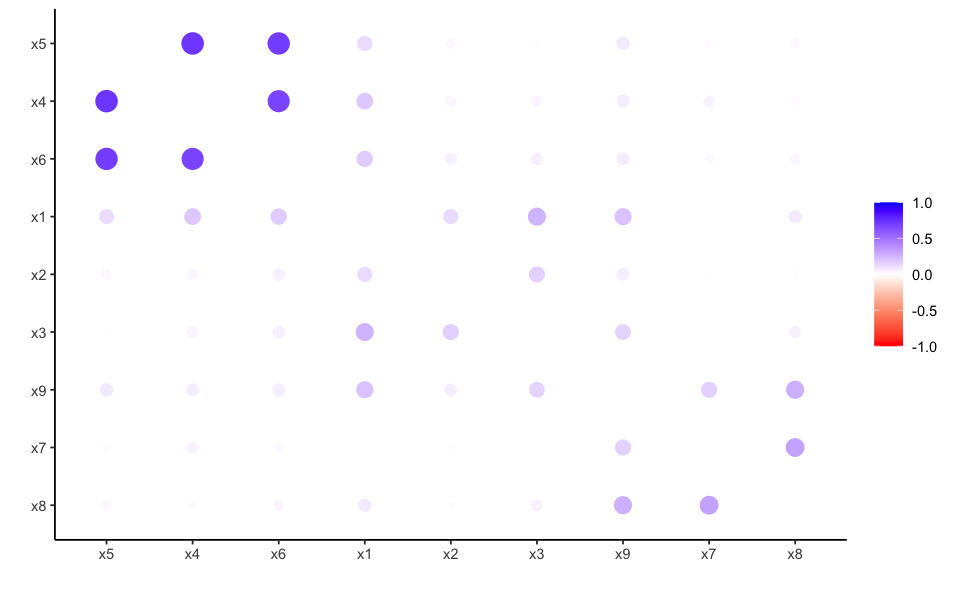

In [7]:
cor_tb <- correlate(hz)

cor_tb |>
  rearrange() |>
  rplot(colors = c("red", "white", "blue"))

Il grafico suggerisce la presenza di tre gruppi di variabili:

- da x4 a x6 (primo gruppo)
- da x1 a x3 (secondo gruppo)
- da x7 a x9 (terzo gruppo).

## Sfericità di Bartlett

Il test di sfericità di Bartlett verifica l’ipotesi che il campione provenga da una popolazione in cui le variabili non sono correlate. Formalmente, il test della sfericità di Bartlett verifica l'ipotesi $H_0 : \boldsymbol{R} = \boldsymbol{I}$ tramite la formula:

$$
\chi^2 = -\bigg[n -1 -\frac{1}{6} (2p +5)\bigg] \ln |\boldsymbol{R}|,
$$

in cui $n$ è il numero dei soggetti, $p$ il numero delle variabili e
$|\boldsymbol{R}|$ il determinante della matrice di correlazione. 

La statistica del test di sfericità di Bartlett segue una distribuzione chi-quadro con $p(p - 1)/2$ gradi di libertà. Un valore elevato della statistica indica che la matrice di correlazione R contiene valori di correlazione significativamente diversi da 0. Al contrario, un valore basso della statistica indica che le correlazioni sono basse e non si distinguono da 0.

Il limite di questo test è che dipende dal numero delle variabili e dalla
numerosità del campione, quindi tende a rigettare $H_0$ all'aumentare del campione e del numero delle variabili, anche se le
correlazioni sono piccole.

Applichiamo il test di Bartlet per il dati dell'esempio in discussione.

In [8]:
cor_mat <- cor(hz)

out = cortest.bartlett(R = cor_mat, n = 301)
print(out)

$chisq
[1] 904.0971

$p.value
[1] 1.912079e-166

$df
[1] 36



Il risultato del test di Bartlett sui dati `HolzingerSwineford1939` indica che esiste una correlazione tra le variabili.


## Test di adeguatezza campionaria di Kaiser-Meyer-Olkin

Il test di Kaiser-Meyer-Olkin (KMO) è uno strumento statistico che valuta l’adeguatezza dei dati per l’analisi fattoriale. Esso misura la proporzione di varianza tra le variabili che potrebbe essere attribuita a fattori comuni. Un valore KMO più alto indica una maggiore adattabilità dei dati all’analisi fattoriale. 

La statistica di adeguatezza campionaria KMO è data da

$$\text{KMO} = \frac{\sum_i\sum_j r^2_{ij}}{\sum_i\sum_j r^2_{ij} +\sum_i\sum_jp^2_{ij}},$$

dove $r_{ij}$ sono le correlazioni osservate e $p_{ij}$ sono le
correlazioni parzializzate su tutte le altre. Se le correlazioni
parzializzate sono piccole, KMO tende a 1. 

Secondo Kaiser (1970), l'adeguatezza campionaria si valuta nel modo seguente:

- da 0.00 a 0.49: inaccettabile
- da 0.50 a 0.59: miserabile
- da 0.60 a 0.69: mediocre
- da 0.70 a 0.79: media
- da 0.80 a 0.89: meritevole
- da 0.90 a 1.00: meravigliosa.

Applichiamo il test KMO ai dati `HolzingerSwineford1939`.

In [9]:
out = KMO(cor_mat)
print(out)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = cor_mat)
Overall MSA =  0.75
MSA for each item = 
  x1   x2   x3   x4   x5   x6   x7   x8   x9 
0.81 0.78 0.73 0.76 0.74 0.81 0.59 0.68 0.79 


Per questi dati, il risultato del test KMO indica che l'adeguatezza campionaria è media.